In [0]:
#CIFAR-10 is dataset of 60,000 tiny images of objects from 10 classes i.e. Airplane, Automobile, Bird, Cat,Deer, Dog, Frog, Horse , Ship and Truck. This dataset can be used for image classfication.   
#Visualise first 36 images of dataset.
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

 Visualise first 36 images of dataset.

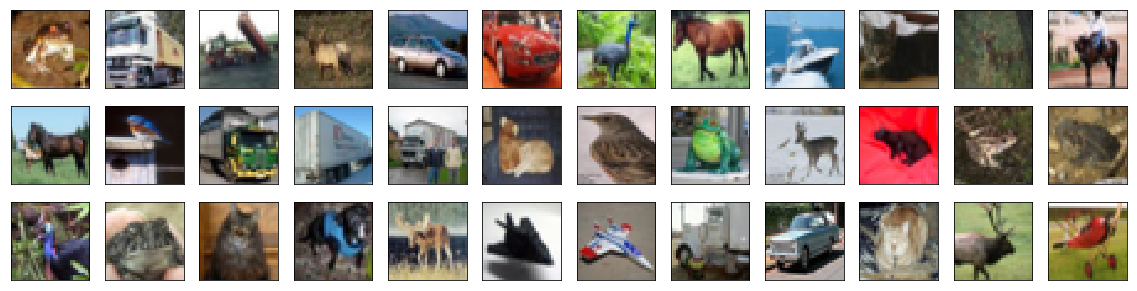

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

Preprocessing step 1 --> Dividing each pixel in each image by 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Dividing dataset into training, validation and testing data.

Training Dataset: The sample of data used to fit the model.

Validation Dataset: The validation set is used to evaluate a given model, but this is for frequent evaluation. We as machine learning engineers use this data to fine-tune the model hyperparameters.

Test Dataset: It is used to evaluate the model.



In [0]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


Peprocessing step 2 --> Image augmentation can boost performance of deep neural networks using very little training data. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.  


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

Comparing original images and augmented images.

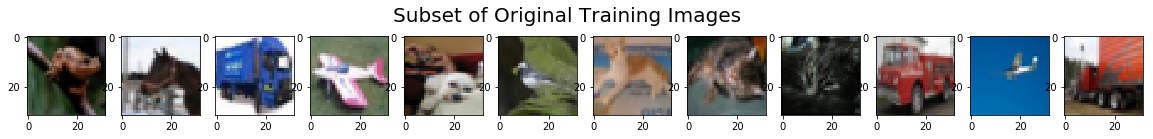

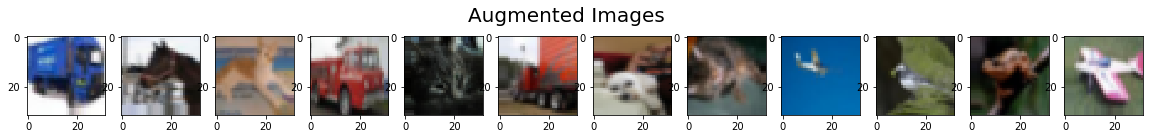

In [0]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;


Sequential model allows us  to create models layer-by-layer. It is linear stack of layers.

Conv2D: This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

Activation layer used: elu

The exponential linear activation: x if x > 0 and alpha * (exp(x)-1) if x < 0.

Pooling layer: Max 2D

Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network.



Overfitting problem can be solved by using following techniques:

1. kernel regularizers: allows to apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes.

2. BatchNormalization: normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 

3. Dropout: randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization. 

Flattening layer: Converting 2 dimensional matrix into vector which can be fed to neural network classifier.




In [0]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import regularizers


weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
from tensorboardcolab import *
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://7b8ed8f8.ngrok.io


Compile the model

In [0]:
from tensorflow.keras.callbacks import TensorBoard
 
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

ModelCheckpointing is setup to save the network weights only when there is an improvement in classification accuracy on the validation dataset.

In [0]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer,TensorBoardColabCallback(tbc),history],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)



Epoch 1/100
 - 43s - loss: 1.9033 - acc: 0.4272 - val_loss: 1.4857 - val_acc: 0.5540

Epoch 00001: val_loss improved from inf to 1.48566, saving model to aug_model.weights.best.hdf5

Epoch 2/100
 - 41s - loss: 1.2621 - acc: 0.5951 - val_loss: 1.1290 - val_acc: 0.6476

Epoch 00002: val_loss improved from 1.48566 to 1.12898, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 41s - loss: 1.0757 - acc: 0.6586 - val_loss: 0.8933 - val_acc: 0.7306

Epoch 00003: val_loss improved from 1.12898 to 0.89332, saving model to aug_model.weights.best.hdf5
Epoch 4/100
 - 42s - loss: 0.9719 - acc: 0.6991 - val_loss: 0.8600 - val_acc: 0.7426

Epoch 00004: val_loss improved from 0.89332 to 0.86002, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 42s - loss: 0.9061 - acc: 0.7260 - val_loss: 0.9230 - val_acc: 0.7388

Epoch 00005: val_loss did not improve from 0.86002
Epoch 6/100
 - 41s - loss: 0.8688 - acc: 0.7430 - val_loss: 0.8348 - val_acc: 0.7612

Epoch 00006: val_loss improved fro

The weights are stored in a file that includes the score in the .hdf5 file.

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

Test model against testing dataset

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.8612


Checking some of images classified correctly or not

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

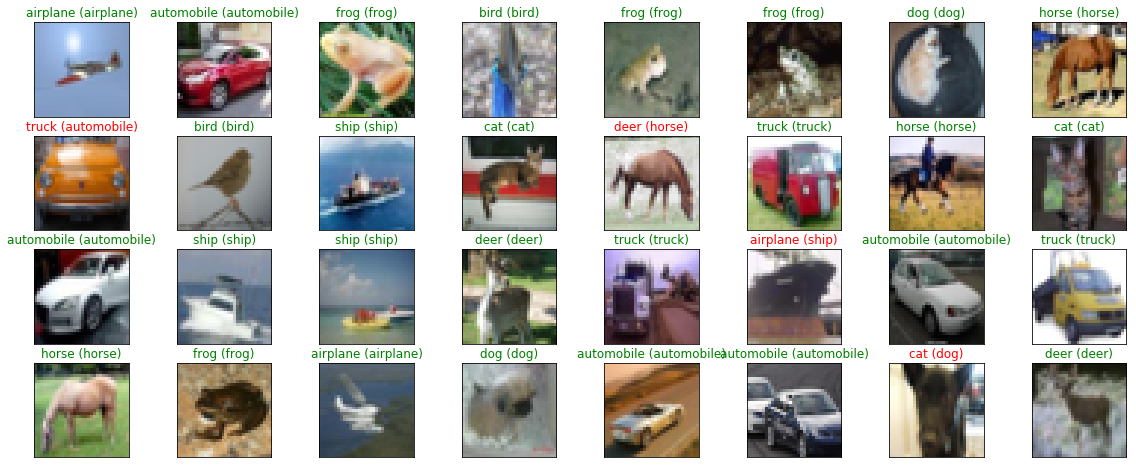

In [65]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

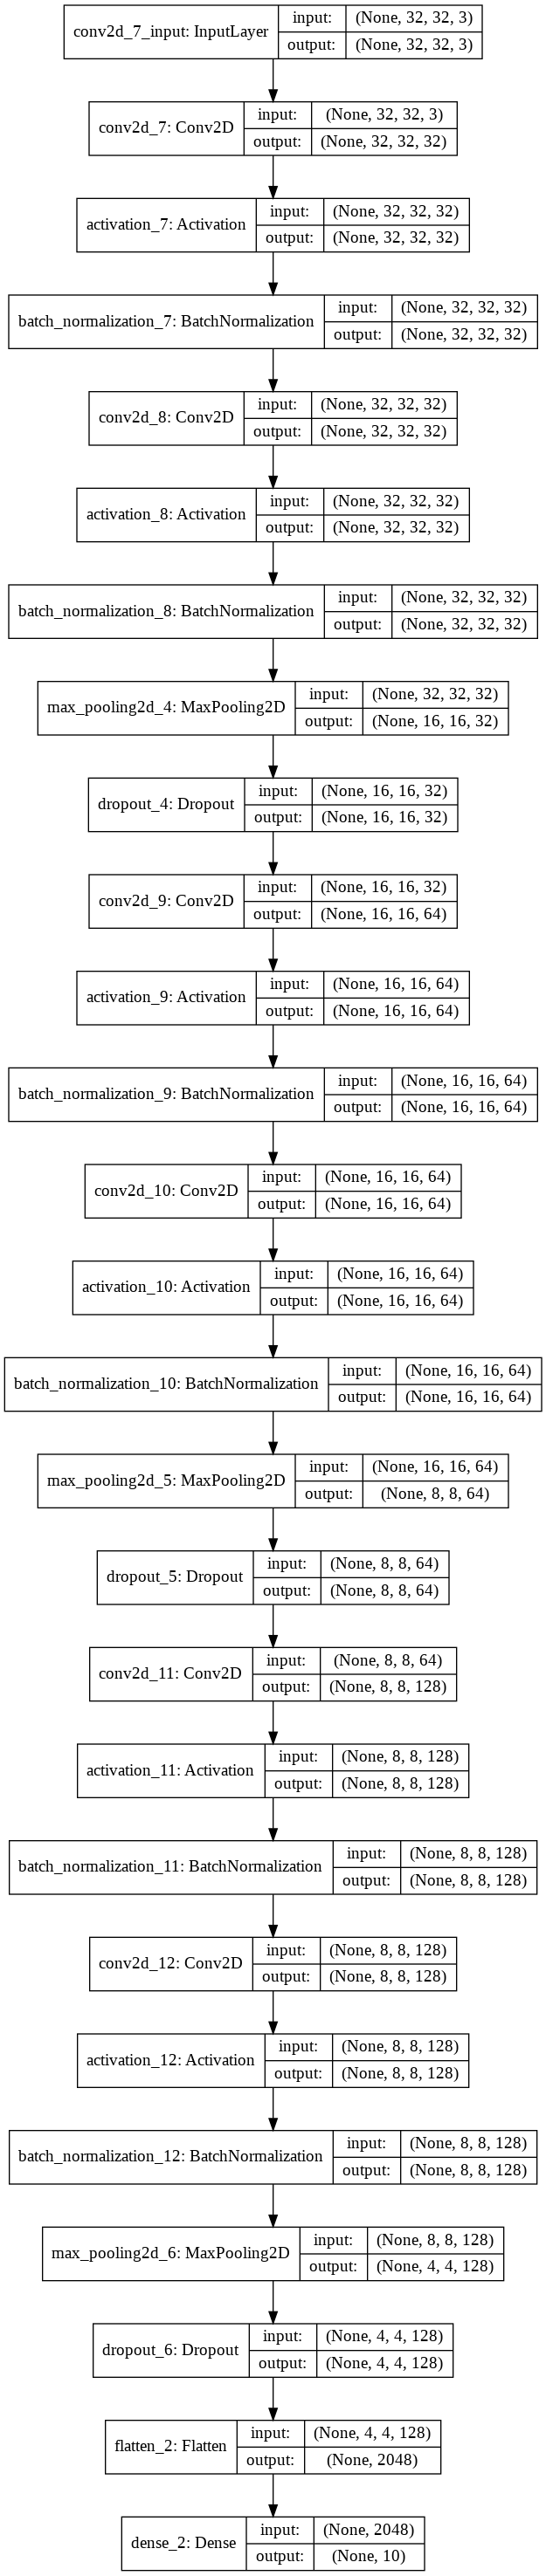

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
#import sklearn.metrics as metrics
#from keras.wrappers.scikit_learn import KerasClassifier

#y_pred = KerasClassifier.predict(x_test)  # shape=(n_samples, 12)
#y_pred_labels = np.argmax(y_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)



#confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12
y_hat1=np.argmax(y_hat,axis=1)
y_test1=np.argmax(y_test,axis=1)
sess = tf.InteractiveSession()
with sess.as_default():
  con_mat = tf.math.confusion_matrix(labels=y_test1, predictions=y_hat1).eval(session=sess)

In [0]:
import pandas as pd
classes=[0,1,2,3,4,5,6,7,8,9]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

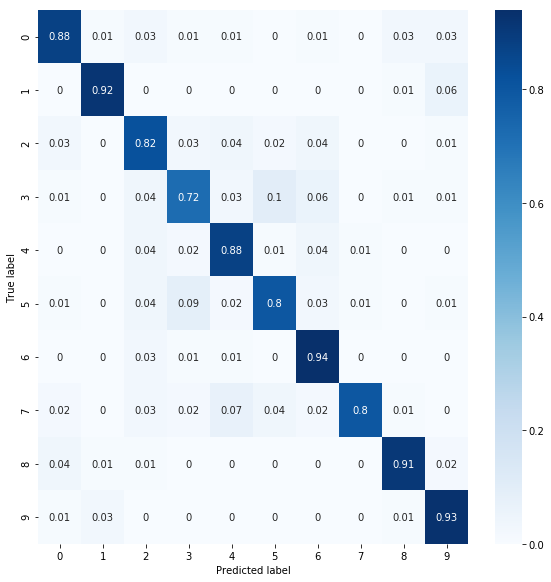

<Figure size 432x288 with 0 Axes>

In [119]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig("heatmap.png") 